In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

job_table = pd.read_csv('/content/drive/MyDrive/job_table.csv')
task_table = pd.read_csv('/content/drive/MyDrive/task_table.csv')
sensor_table = pd.read_csv('/content/drive/MyDrive/sensor_table.csv')

merged_data = pd.merge(job_table, task_table, on='job_name')
merged_data = pd.merge(merged_data, sensor_table, on='job_name')

print(merged_data.columns)

result = merged_data[['job_name','task_name', 'start_time', 'end_time', 'plan_cpu', 'plan_gpu', 'gpu_util', 'cpu_usage']]

result.to_csv('/content/drive/MyDrive/dataset.csv', index=False)


In [ ]:
import pandas as pd
merged_data1 = pd.read_csv('/content/drive/MyDrive/dataset.csv')
null_values = merged_data1.isnull().sum()
print("Null values in the DataFrame:")
print(null_values)


Null values in the DataFrame:
job_name      1
task_name     1
start_time    1
end_time      1
plan_cpu      1
plan_gpu      1
cpu_usage     0
gpu_util      1
dtype: int64


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')
df = df.dropna(subset=['job_name', 'task_name', 'start_time', 'end_time', 'plan_cpu', 'plan_gpu', 'gpu_util'])
df.to_csv('/content/drive/MyDrive/dataset1.csv', index=False)



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset1.csv')


In [ ]:
null_values = df.isnull().sum()
print("Null values in the DataFrame:")
print(null_values)

Null values in the DataFrame:
job_name      0
task_name     0
start_time    0
end_time      0
plan_cpu      0
plan_gpu      0
cpu_usage     0
gpu_util      0
dtype: int64


In [ ]:
print(df.head())

                   job_name       task_name  start_time   end_time  plan_cpu  \
0  455c3dec270f4777ad67721c      tensorflow   1087037.0  1099064.0    6000.0   
1  ba64aa2f0feff18428923e92      tensorflow   1089789.0  1100586.0    4000.0   
2  704783be2a4b7f88b8d2e4ee          worker   1090303.0  1102708.0    6000.0   
3  bce3b9c55772f9d1e85fe796   PyTorchWorker   1098196.0  1104630.0    6000.0   
4  d45e51734a9bd73fb94fa849  xComputeWorker   1098843.0  1106235.0    4000.0   

   plan_gpu  cpu_usage  gpu_util  
0    2000.0       2800     800.0  
1    2000.0       1600    1000.0  
2    2000.0        600     800.0  
3    2000.0        200     200.0  
4    2000.0       2400     600.0  


In [ ]:
import pandas as pd
import numpy as np
columns_to_check = [ 'start_time' , 'end_time' ,'plan_cpu' , 'plan_gpu' ,'cpu_usage' ,'gpu_util' ]
z_scores = np.abs((df[columns_to_check] - df[columns_to_check].mean()) / df[columns_to_check].std())
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]


In [ ]:

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame without outliers shape: {df_no_outliers.shape}")

Original DataFrame shape: (657, 8)
DataFrame without outliers shape: (603, 8)


In [ ]:
df_no_outliers.to_csv('/content/drive/MyDrive/dataset1.csv', index=False)

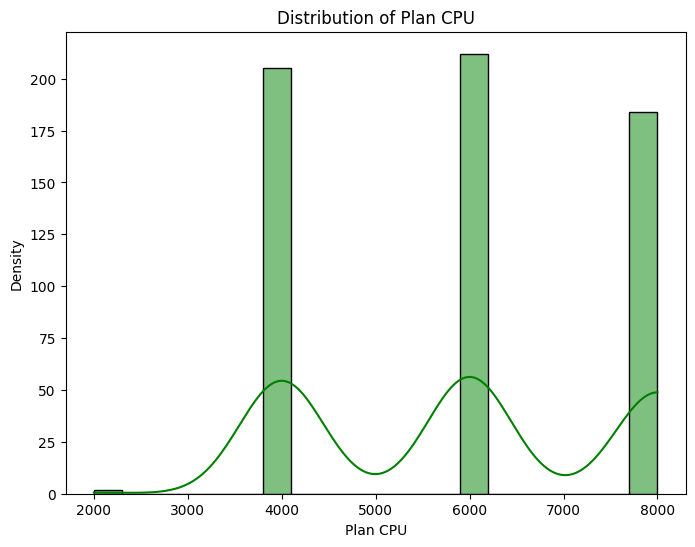

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['plan_cpu'], kde=True, color='green', bins=20)
plt.title('Distribution of Plan CPU')
plt.xlabel('Plan CPU')
plt.ylabel('Density')
plt.show()

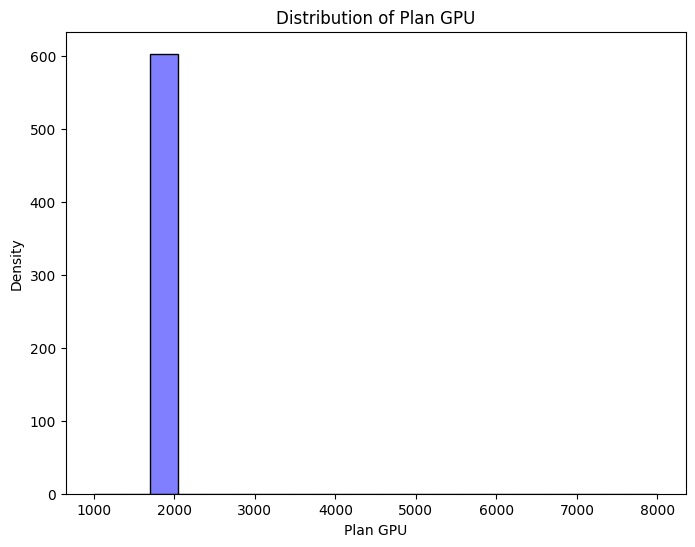

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['plan_gpu'], kde=True, color='blue', bins=20, binrange=(1000,8000))
plt.title('Distribution of Plan GPU')
plt.xlabel('Plan GPU')
plt.ylabel('Density')
plt.show()

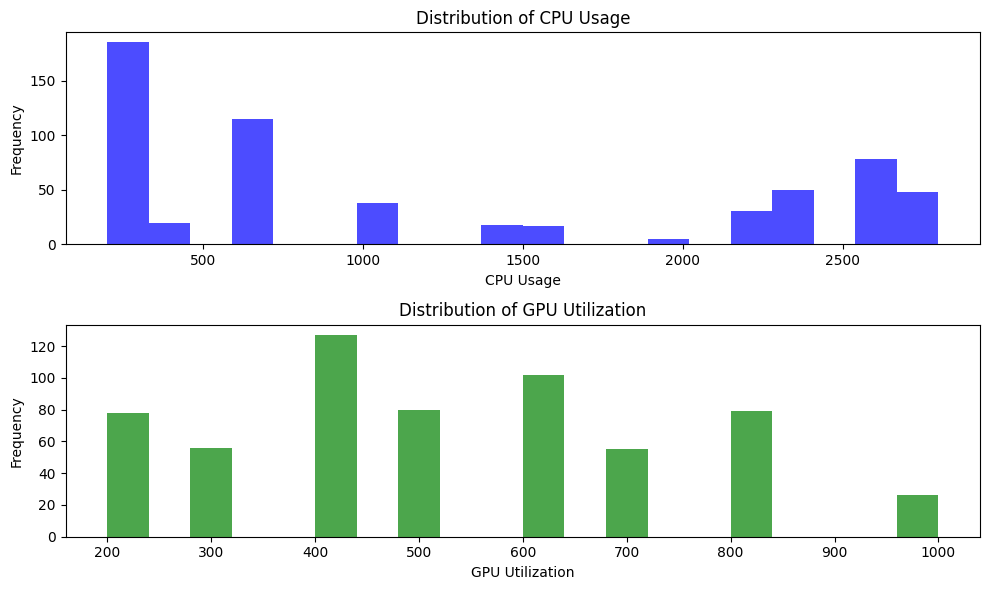

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(df['cpu_usage'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of CPU Usage')
plt.xlabel('CPU Usage')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(df['gpu_util'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of GPU Utilization')
plt.xlabel('GPU Utilization')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


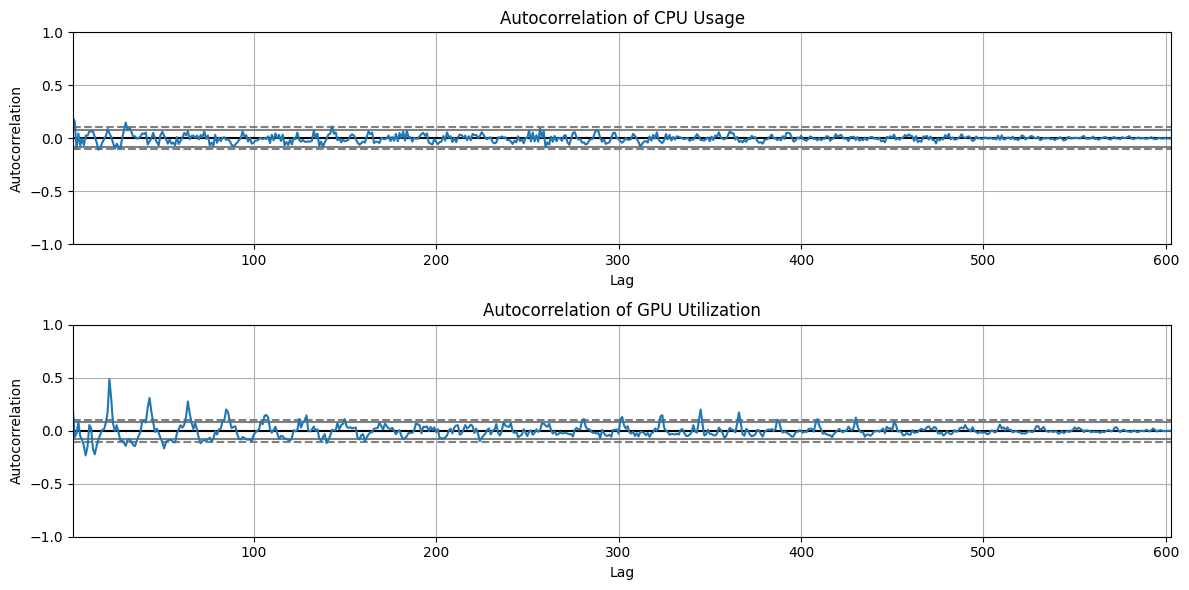

Autocorrelation of CPU Usage: 0.18985523851284983
Autocorrelation of GPU Utilization: 0.19491150266619228
Weak autocorrelation in CPU Usage.
Weak autocorrelation in GPU Utilization.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing CPU usage and GPU utilization data
df = pd.read_csv("/content/drive/MyDrive/dataset1.csv")
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
pd.plotting.autocorrelation_plot(df['cpu_usage'])
plt.title('Autocorrelation of CPU Usage')

plt.subplot(2, 1, 2)
pd.plotting.autocorrelation_plot(df['gpu_util'])
plt.title('Autocorrelation of GPU Utilization')

plt.tight_layout()
plt.show()

# Print the autocorrelation results
cpu_autocorr = df['cpu_usage'].autocorr()
gpu_autocorr = df['gpu_util'].autocorr()

print("Autocorrelation of CPU Usage:", cpu_autocorr)
print("Autocorrelation of GPU Utilization:", gpu_autocorr)

# Interpretation
if abs(cpu_autocorr) >= 0.8:
    print("Strong autocorrelation in CPU Usage.")
elif abs(cpu_autocorr) >= 0.5:
    print("Moderate autocorrelation in CPU Usage.")
else:
    print("Weak autocorrelation in CPU Usage.")

if abs(gpu_autocorr) >= 0.8:
    print("Strong autocorrelation in GPU Utilization.")
elif abs(gpu_autocorr) >= 0.5:
    print("Moderate autocorrelation in GPU Utilization.")
else:
    print("Weak autocorrelation in GPU Utilization.")


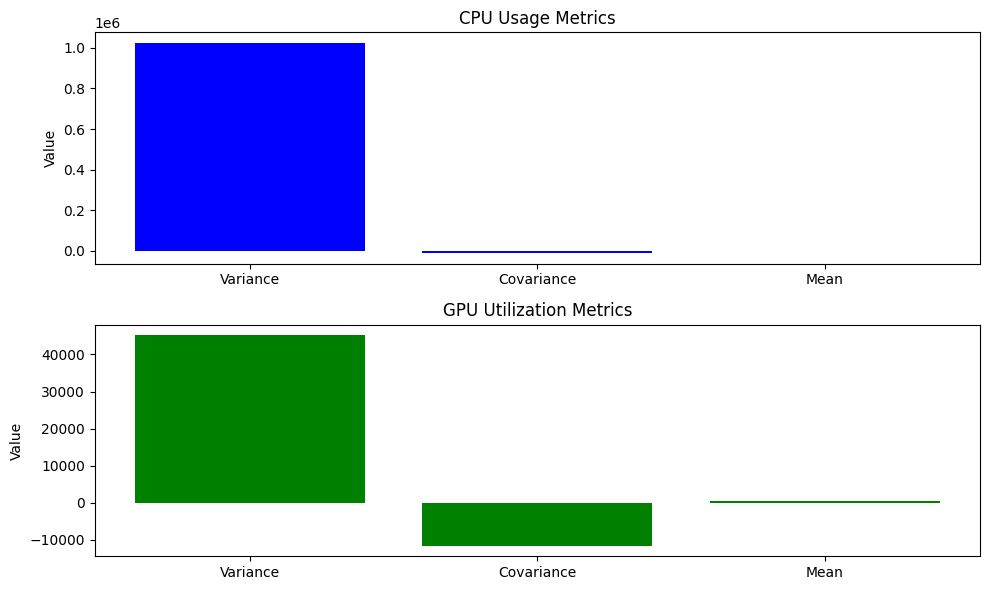

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
cpu_usage_variance = df['cpu_usage'].var()
gpu_util_variance = df['gpu_util'].var()

covariance = df[['cpu_usage', 'gpu_util']].cov().iloc[0, 1]

cpu_usage_mean = df['cpu_usage'].mean()
gpu_util_mean = df['gpu_util'].mean()

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.bar(['Variance', 'Covariance', 'Mean'], [cpu_usage_variance, covariance,  cpu_usage_mean], color='blue')
plt.title('CPU Usage Metrics')
plt.ylabel('Value')

plt.subplot(2, 1, 2)
plt.bar(['Variance', 'Covariance',  'Mean'], [gpu_util_variance, covariance,  gpu_util_mean], color='green')
plt.title('GPU Utilization Metrics')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


Missing values in each column:
plan_cpu     0
plan_gpu     0
cpu_usage    0
gpu_util     0
dtype: int64
Columns with constant values: Index(['plan_gpu'], dtype='object')

ADF Test for plan_cpu:
ADF Statistic: -7.6151495949678285
p-value: 2.2018744510669035e-11
Critical Values: {'1%': -3.441616425652826, '5%': -2.866510292004876, '10%': -2.5694170294713863}
The time series plan_cpu is stationary (reject the null hypothesis)


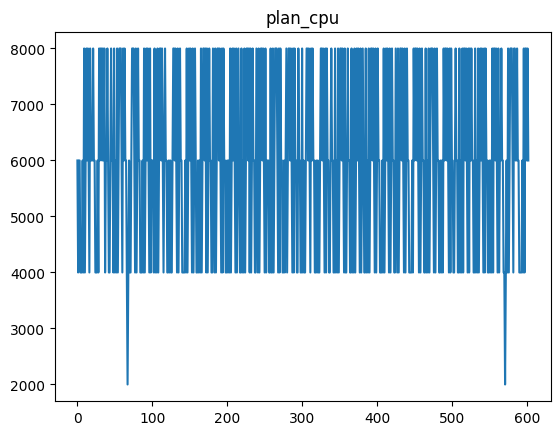


ADF Test for plan_gpu:
ADF Statistic: -7.6151495949678285
p-value: 2.2018744510669035e-11
Critical Values: {'1%': -3.441616425652826, '5%': -2.866510292004876, '10%': -2.5694170294713863}
The time series plan_gpu is stationary (reject the null hypothesis)


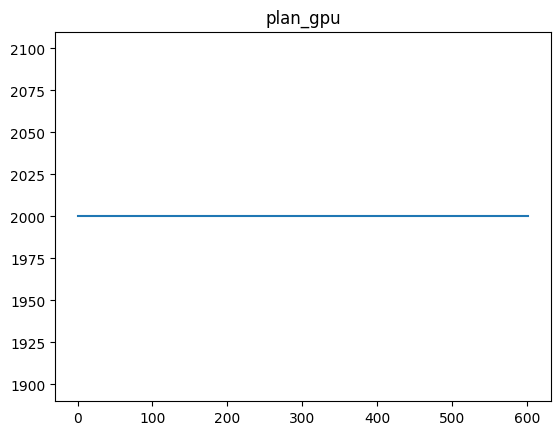


ADF Test for cpu_usage:
ADF Statistic: -7.6151495949678285
p-value: 2.2018744510669035e-11
Critical Values: {'1%': -3.441616425652826, '5%': -2.866510292004876, '10%': -2.5694170294713863}
The time series cpu_usage is stationary (reject the null hypothesis)


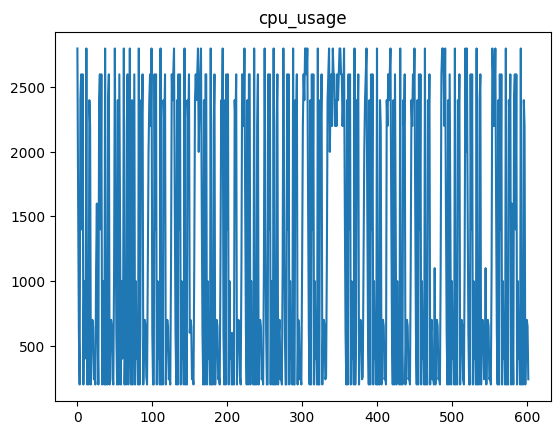


ADF Test for gpu_util:
ADF Statistic: -7.6151495949678285
p-value: 2.2018744510669035e-11
Critical Values: {'1%': -3.441616425652826, '5%': -2.866510292004876, '10%': -2.5694170294713863}
The time series gpu_util is stationary (reject the null hypothesis)


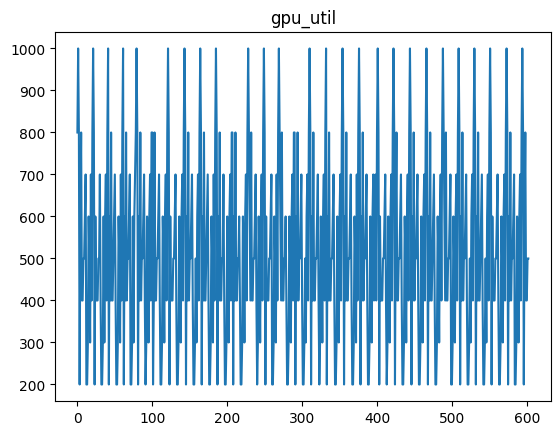

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/dataset1.csv')
your_time_series_data = df[['plan_cpu', 'plan_gpu', 'cpu_usage', 'gpu_util']]
print("Missing values in each column:")
print(your_time_series_data.isnull().sum())
constant_columns = your_time_series_data.columns[your_time_series_data.nunique() == 1]
print("Columns with constant values:", constant_columns)
for column in your_time_series_data.columns:
    print(f"\nADF Test for {column}:")
    print('ADF Statistic:', result_adf[0])
    print('p-value:', result_adf[1])
    print('Critical Values:', result_adf[4])
    if result_adf[1] <= 0.05:
        print(f"The time series {column} is stationary (reject the null hypothesis)")
    else:
        print(f"The time series {column} is non-stationary (fail to reject the null hypothesis)")
    plt.plot(your_time_series_data[column])
    plt.title(column)
    plt.show()

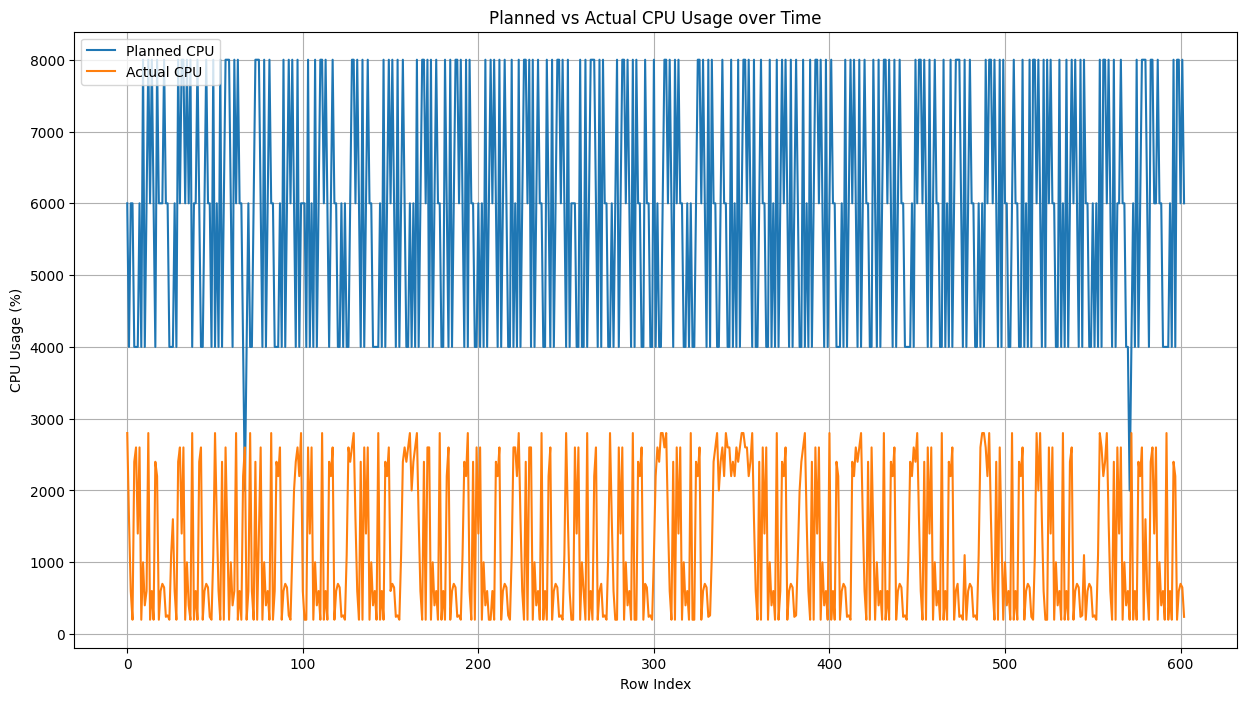

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/dataset1.csv')
plt.figure(figsize=(15, 8))

plt.plot(df.index, df['plan_cpu'], label='Planned CPU')
plt.plot(df.index, df['cpu_usage'], label='Actual CPU', markersize=5)

plt.title('Planned vs Actual CPU Usage over Time')
plt.xlabel('Row Index')
plt.ylabel('CPU Usage (%)')

plt.legend()
plt.grid(True)
plt.show()


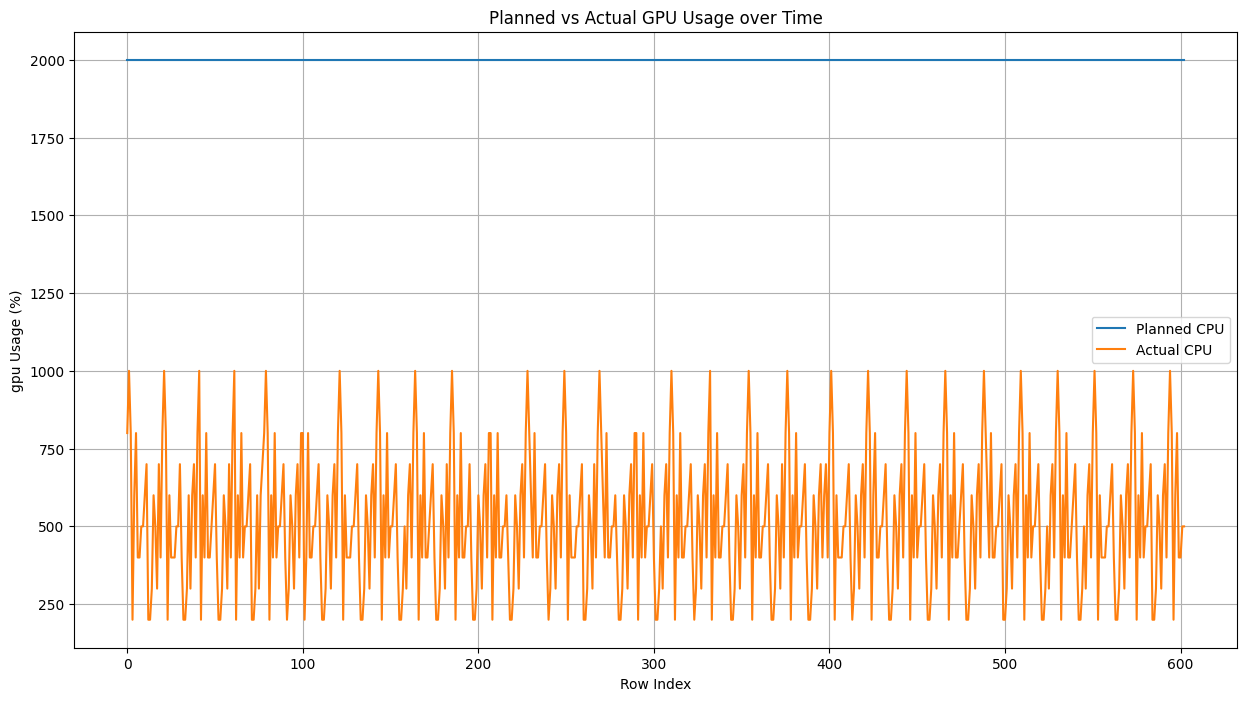

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/dataset1.csv')
plt.figure(figsize=(15, 8))

plt.plot(df.index, df['plan_gpu'], label='Planned CPU')
plt.plot(df.index, df['gpu_util'], label='Actual CPU', markersize=5)

plt.title('Planned vs Actual GPU Usage over Time')
plt.xlabel('Row Index')
plt.ylabel('gpu Usage (%)')

plt.legend()
plt.grid(True)
plt.show()
